In [5]:
import urllib.request
from bs4 import BeautifulSoup

class Review:
    def __init__(self, comment, date, star, good, bad):
        self.comment = comment
        self.date = date
        self.star = star
        self.good = good
        self.bad = bad
        
    def show(self):
        print("내용: " + self.comment +
             "\n날짜: " + self.date +
             "\n별점: " + self.star +
             "\n좋아요: " + self.good +
             "\n싫어요: " + self.bad)
        
def crawl(url):
    soup = BeautifulSoup(urllib.request.urlopen(url).read(), "html.parser")
    review_list = [] 
    title = soup.find('h3', class_="h_movie").find('a').text
    div = soup.find('div', class_='score_result')
    data_list = div.select('ul > li')
    
    for review in data_list:
        star = review.find('div', class_='star_score').text.strip()
        reply = review.find("div", class_="score_reple")
        comment = reply.find("p").text
        date = reply.select("dt > em")[1].text.strip()
        button = review.find("div", class_="btn_area")
        sympathy = button.select("strong > span")
        good = sympathy[0].text
        bad = sympathy[1].text
        review_list.append(Review(comment, date, star, good, bad))
        
    return title, review_list 

In [6]:
import pandas as pd

def get_summary(review_list): # 데이터 프레임화
    star_list = []
    good_list = []
    bad_list = []
  
    for review in review_list:
        star_list.append(int(review.star))
        good_list.append(int(review.good))
        bad_list.append(int(review.bad))
    
    star_series = pd.Series(star_list)
    good_series = pd.Series(good_list)
    bad_series = pd.Series(bad_list)
  
    summary = pd.DataFrame({
        'Star': star_series,
        'Good': good_series,
        'Bad': bad_series,
        'Score': good_series / (good_series + bad_series)
    })
  
    return summary

movie_code_list = [136900, 167657, 174321, 184859, 167391]
review_lists = []

for i in movie_code_list:
    title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i))
    summary = get_summary(review_list)
    print("[ %s ]" % (title))
    print(summary)
    review_lists.append((title, review_list))

[ 어벤져스: 엔드게임 ]
   Star   Good  Bad     Score
0    10  22638  633  0.972799
1    10  14914  420  0.972610
2    10  14530  451  0.969895
3    10  12497  519  0.960126
4    10  11287  409  0.965031
[ 명탐정 피카츄 ]
   Star  Good  Bad     Score
0    10  1876  103  0.947954
1    10   949   81  0.921359
2    10   802   71  0.918671
3     8   925  282  0.766363
4     8   582   34  0.944805
[ 고양이 여행 리포트 ]
   Star  Good  Bad     Score
0    10    59    5  0.921875
1    10    36    3  0.923077
2     6    40   18  0.689655
3    10    23    2  0.920000
4    10    25    4  0.862069
[ 물의 기억 ]
   Star  Good  Bad     Score
0    10    28   10  0.736842
1    10    26   10  0.722222
2    10    23    9  0.718750
3    10    14    2  0.875000
4    10    18    6  0.750000
[ 더 캡틴 ]
   Star  Good  Bad     Score
0     9    67   11  0.858974
1    10    37    4  0.902439
2    10    36    7  0.837209
3     8    30    5  0.857143
4     8    21    0  1.000000


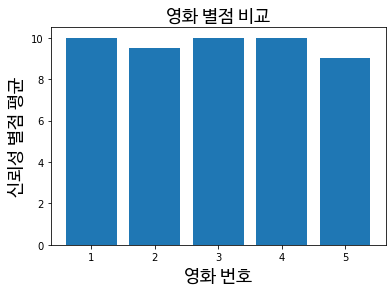

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = './data/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

def movie_compare(review_lists):
    count = 1
    x = []
    y = []
    for movie, review_list in review_lists:
        x.append(count)
        summary = get_summary(review_list)
        summary = summary[summary['Score'] > 0.8]
        y.append(summary['Star'].mean())
        count += 1
    plt.bar(x, y)
    plt.title('영화 별점 비교', fontproperties=fontprop)
    plt.xlabel('영화 번호', fontproperties=fontprop)
    plt.ylabel('신뢰성 별점 평균', fontproperties=fontprop)
    plt.show()
    
movie_compare(review_lists)